<a href="https://colab.research.google.com/github/Raghuram-Veeramallu/Astro_Stat_Proj3/blob/development/Project3_Group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AST/STAT 5731 Project 3

## Research Synopsis

**Group 3**   
Christopher Guo  
Daniel Warshofsky  
Hari Veeramallu  
Jacynda Alatoma  
Nicholas Kruegler  

### 0. Research Question

What is the size distribution of sunspots above the lower bound of reliable size measurements?

### 1. Preamble

Sunspots play an important role in the magnetic dynamics of the sun and can indicate local processes near the surface. They are also a signal of overall solar activity, so understanding their prevelance can be an important foundational tool for further research in the field. [Previous research](https://doi.org/10.1051/0004-6361:20053415) has modeled the number density of sunspots over all whole spot areas using a log-normal distribution, which is the prescription we will follow in this project.

This reference also recommends not using the full data set and only performs the fit above an area of $A_{min}=60$ millionths of a solar hemisphere (MSH) as they are "falsified from enhanced intrinsic measurement errors as well as from distortions due to atmospheric seeing". Therefore, this requires the use of a truncated log-normal to appropriately model the data, and we will only focus on the data with at least a size of 60 MSH.

### 2. Software and Installation

We recommend using a `conda` environment to install the requirements and run the notebook.  

1. Install Conda
Conda can be installed from this page: https://conda.io/projects/conda/en/latest/user-guide/install/index.html.  

2. Create a conda environment
```
conda create --name ast5731_group3_project3 --file requirements.txt
```
You can change the name of the environment from `ast5731_group3_project3` to the one you want.

3. Install Jupyter notebook from this page: https://jupyter.org/install  

4. The notebook can be run using by starting the jupyter notebook server
```
# to start the server
jupyter notebook
```
Navigate to the file and run the `Project3_Group3.ipynb`

### 3. Data and Model Explanation

#### 3.1 Data Source and Preprocessing of Data

The data for this project was obtained from the UK Solar System Data Centre https://www.ukssdc.ac.uk/wdcc1/greenwich/. It contains all sunspot group reports from 1874 to 1981. Because each year contains so much information and data, we selected years 1976 and 1968. The reason why 1968 was chosen as one of the years is because it was when the solar maximum, the most observed amount of sunspots in a solar cycle, occurred. 1976 was then chosen as it was the last year of the of the Greenwich sunspot record. Only the area of complete sunspot groups and not of individual sunspots have been recorded.

After selecting these two .grp files, we moved them into an excel sheet and separated the columns according to the grnwich.fmt file which tells what each column means. So for instance, columns 1-4 tell the year so we separated data by that.

[UK Solar System Data Center](https://www.ukssdc.ac.uk/wdcc1/greenwich/) (Need to register [here](https://www.ukssdc.ac.uk/cgi-bin/wdcc1/userreg.pl) and use email as the credential with password being blank.)  
[GDrive](https://drive.google.com/uc?id=1nOktHZ4Qs8jKDr2GPzAje64YlsDZdysb)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

In [ ]:
# downloads the dataset to colab
!gdown 1nOktHZ4Qs8jKDr2GPzAje64YlsDZdysb

Downloading...
From: https://drive.google.com/uc?id=1nOktHZ4Qs8jKDr2GPzAje64YlsDZdysb
To: /content/SunspotDist.csv
100% 225k/225k [00:00<00:00, 68.3MB/s]


In [ ]:
# on colab
data = pd.read_csv("./SunspotDist.csv")

# for local access, replpace the "./SunspotDist.csv" with the datapath

In [ ]:
data

,Year,Month,Day,Time in Thousandths of day,Greenwich sunspot group number,Mt. Wilson Magnetic Classification,Greenwich Group Type,Observed umbral area in millionths of solar disk,Observed whole spot area in millionths of solar disk,Corrected umbral area in millionths of solar hemisphere,Corrected whole spot area in millionths,Distance from center of solar disk in disk radii,Polar angle,Carrington Longitude,Latitude,Central meridian distance
0,1976,1,12,0.46,23680,0,7,1,19,1,12,0.596,261.1,34.1,-8.7,36.4
1,1976,1,13,0.421,23680,0,7,2,17,2,13,0.747,262.2,33.4,-8.7,48.4
2,1976,1,14,0.281,23680,0,7,2,12,2,12,0.863,263.4,33.4,-8.0,59.7
3,1976,1,12,0.46,23681,0,5,14,97,26,172,0.959,100.7,284.0,-11.4,-73.7
4,1976,1,13,0.421,23681,0,5,79,411,82,425,0.875,100.4,284.0,-11.2,-61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,1968,12,20,0.285,154204,0,0,0,3,0,5,0.918,59.2,136.8,27.3,-62.2
3385,1968,12,21,0.475,154205,0,0,1,17,5,43,0.980,286.8,260.7,16.1,77.4
3386,1968,12,22,0.513,154206,0,0,0,12,0,7,0.421,212.3,183.8,-22.6,14.1
3387,1968,12,26,0.572,154207,0,0,0,17,0,9,0.323,321.5,128.1,12.2,11.9


In [ ]:
# total data description
data.describe()

,Year,Month,Day,Greenwich sunspot group number,Mt. Wilson Magnetic Classification,Greenwich Group Type,Observed umbral area in millionths of solar disk,Observed whole spot area in millionths of solar disk,Corrected umbral area in millionths of solar hemisphere,Corrected whole spot area in millionths,Distance from center of solar disk in disk radii,Polar angle,Carrington Longitude,Latitude,Central meridian distance
count,3389.000000,3389.000000,3389.000000,3389.000000,3389.0,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000
mean,1969.005606,6.375922,15.872529,30555.838595,0.0,2.884332,36.800531,248.903216,27.996459,187.352316,0.645477,178.385099,161.383151,-0.261906,-0.342667
std,2.652486,3.360611,8.826628,32847.511201,0.0,2.799723,60.831330,417.971854,40.774895,280.386918,0.245082,97.891371,99.518933,17.932533,45.253175
min,1968.000000,1.000000,1.000000,21444.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.016000,0.000000,0.000000,-46.100000,-86.800000
25%,1968.000000,4.000000,8.000000,21579.000000,0.0,0.000000,4.000000,27.000000,3.000000,21.000000,0.448000,84.800000,84.600000,-15.500000,-37.000000
50%,1968.000000,6.000000,16.000000,21694.000000,0.0,2.000000,14.000000,87.000000,13.000000,83.000000,0.667000,172.900000,150.000000,4.500000,-1.200000
75%,1968.000000,9.000000,24.000000,21816.000000,0.0,5.000000,44.000000,287.000000,36.000000,231.000000,0.868000,272.300000,243.300000,15.500000,37.000000
max,1976.000000,12.000000,31.000000,164903.000000,0.0,9.000000,819.000000,5542.000000,449.000000,3202.000000,0.998000,359.600000,359.900000,41.400000,87.400000


In [ ]:
#arrays of the umbral and whole spot areas
umbral = data["Observed umbral area in millionths of solar disk"]
whole = data["Observed whole spot area in millionths of solar disk"]

#truncate the data to only include data from above the whole area cutoff of 60 MSH
trunc = data[whole>60]
whole_trunc = trunc["Observed whole spot area in millionths of solar disk"]

logarea_whole = np.log10(whole)
logarea = np.log10(whole_trunc)

In [ ]:
# total data description
data[whole>60].describe()

,Year,Month,Day,Greenwich sunspot group number,Mt. Wilson Magnetic Classification,Greenwich Group Type,Observed umbral area in millionths of solar disk,Observed whole spot area in millionths of solar disk,Corrected umbral area in millionths of solar hemisphere,Corrected whole spot area in millionths,Distance from center of solar disk in disk radii,Polar angle,Carrington Longitude,Latitude,Central meridian distance
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.0,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,1968.966223,6.429887,15.886899,22036.168884,0.0,3.140737,61.267144,413.123849,45.493859,304.233879,0.628494,179.139253,159.279836,0.731627,-0.653071
std,2.607619,3.392327,9.027239,4252.671900,0.0,2.635795,70.690597,489.047869,46.229821,321.224917,0.239721,99.725420,98.070339,17.533662,43.304301
min,1968.000000,1.000000,1.000000,21444.000000,0.0,0.000000,1.000000,61.000000,1.000000,31.000000,0.016000,0.000000,0.000000,-35.800000,-85.700000
25%,1968.000000,4.000000,8.000000,21569.000000,0.0,1.000000,20.000000,122.000000,17.000000,105.000000,0.439000,80.200000,88.750000,-15.175000,-35.700000
50%,1968.000000,6.000000,16.000000,21674.000000,0.0,3.000000,36.000000,235.000000,31.000000,197.500000,0.637000,173.600000,148.300000,7.200000,-0.550000
75%,1968.000000,9.000000,24.000000,21793.000000,0.0,5.000000,74.000000,491.500000,58.000000,376.000000,0.844750,279.075000,241.800000,15.500000,34.475000
max,1976.000000,12.000000,31.000000,153304.000000,0.0,9.000000,819.000000,5542.000000,449.000000,3202.000000,0.998000,359.600000,359.700000,32.800000,87.400000


In [ ]:
print(f'Observations with Area greater than 60 MSH: {len(data[whole>60])}')
print(f'Observations with Area less than 60 MSH: {len(data[whole<=60])}')

Observations with Area greater than 60 MSH: 1954
Observations with Area less than 60 MSH: 1435


In [ ]:
import seaborn as sns

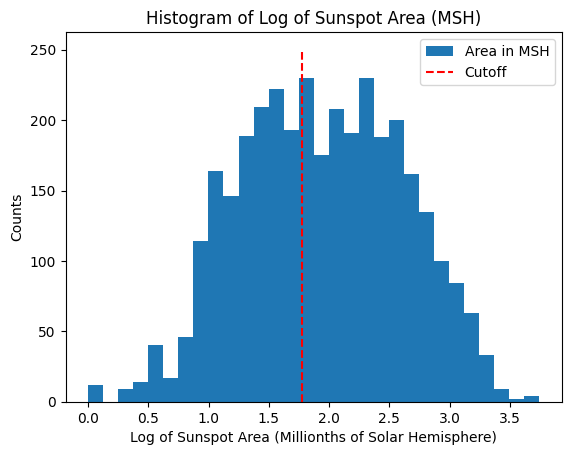

In [ ]:
# we choose 30 bins
nbin = 30

fig,ax = plt.subplots()
ax.hist(logarea_whole, bins=nbin, label='Area in MSH')
ax.vlines(np.log10(60), ymin=0, ymax=250, color='r', linestyle='dashed', label='Cutoff')
ax.set_xlabel("Log of Sunspot Area (Millionths of Solar Hemisphere)")
ax.set_ylabel("Counts")
ax.set_title('Histogram of Log of Sunspot Area (MSH)')
ax.legend()
fig.show()

If we include the data below the cutoff of 60 MSH, we see that the data does get close to approximating a normal (when the log of the sunspot area is graphed). However, the data below the cutoff is not perfectly normal and features a steeper drop off than expected, which represents the issues with the lower data as claimed by the paper being referenced for the project.

As shown below, excluding the data with an area below 60 MSH, provides a closer approximation to a truncated normal, which can more accurately be processed with Monte Carlo simulation.

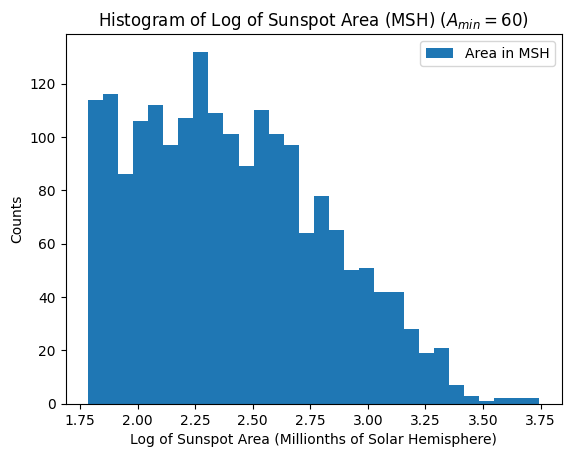

In [ ]:
fig,ax = plt.subplots()
ax.hist(logarea, bins=nbin, label='Area in MSH')
ax.set_xlabel("Log of Sunspot Area (Millionths of Solar Hemisphere)")
ax.set_ylabel("Counts")
ax.set_title(r'Histogram of Log of Sunspot Area (MSH) ($A_{min}=60$)')
ax.legend()
fig.show()

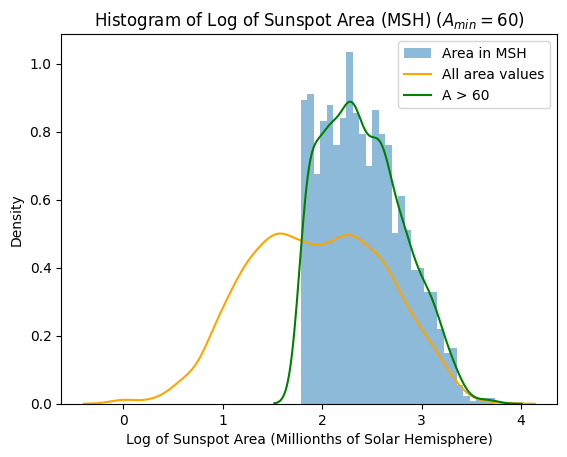

In [ ]:
fig,ax = plt.subplots()
ax.hist(logarea, bins=nbin, label='Area in MSH', density=True, alpha=0.5)
ax.set_xlabel("Log of Sunspot Area (Millionths of Solar Hemisphere)")
ax.set_ylabel("Density")
ax.set_title(r'Histogram of Log of Sunspot Area (MSH) ($A_{min}=60$)')
sns.kdeplot(logarea_whole, color='orange', label='All area values')
sns.kdeplot(logarea, color='green', label=r'A > 60')
ax.legend()
fig.show()

#### 3.2 Statistical Model


1. $\theta$, the log (base 10) area of sunspot  
2. $\Theta \in (1.78, \infty)^{n}$, set of all log of sunspot areas greater than 1.78(i.e. $\log60$)  
3. Observed areas in MSH, $x = [1.79, 3.74]$  
4. Sample space, $\mathbb{X} \in (1.78, \infty)^{n}$  
5. $X|\theta \in \mathrm{TruncatedNormal}(\mu,\tau,a=1.78)$, truncated at lower bound of $\log10(60)$
6. Priors on the normal parameters: $$\mu\sim Normal(0,1/1000)$$ $$\tau\sim Gamma(1,1)$$

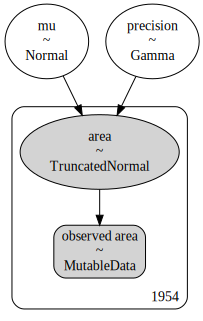

In [352]:
# computing the lower threshold
lower_threshold = round(np.log10(60), 2)

with pm.Model() as model:
  #data
  x = pm.MutableData("observed area",logarea)

  #priors
  precision = pm.Gamma("precision", alpha=1, beta=1)
  mu = pm.Normal("mu", mu=100, tau=1/100000)

  norm = pm.Normal.dist(mu=mu, tau=precision)
  #likelihood
  Y = pm.Truncated("area",dist=norm, lower=lower_threshold, observed=x)

pm.model_to_graphviz(model)

#### 3.3 Prior Predictive Check

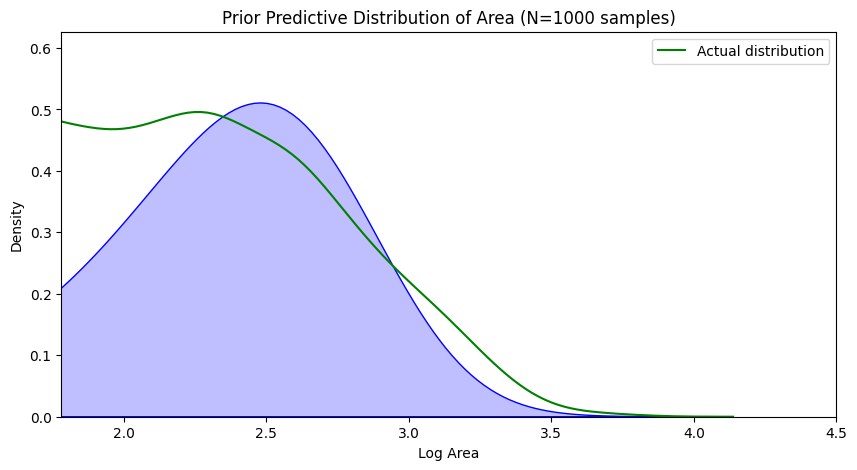

In [356]:
# Generate prior predictive samples
with model:
    prior_pred = pm.sample_prior_predictive(samples=1000)

# Plotting the prior predictive distributions
fig, ax = plt.subplots(figsize=(10, 5))

prior_area_samples = prior_pred.prior_predictive['area'][0]
mean_prior_areas = np.log10(np.mean(prior_pred.prior_predictive['area'][0], axis=1))

sns.kdeplot(mean_prior_areas, fill=True, color='blue')
sns.kdeplot(np.log10(whole), fill=False, color='green', label='Actual distribution')
ax.set_title('Prior Predictive Distribution of Area (N=1000 samples)')
ax.set_xlabel('Log Area')
ax.set_ylabel('Density')
# we shift the axis to begin from the lower threshold
ax.set_xlim(left=lower_threshold, right=4.5)
ax.legend()
plt.show()

The prior predictive curves are closer to the actual distribution, but can be improved by adjusting the priors furthermore.

### 4. Details of the Computations

In [341]:
with model:
  trace = pm.sample(1000,random_seed=314159)

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'precision'}>,
        <Axes: title={'center': 'precision'}>]], dtype=object)

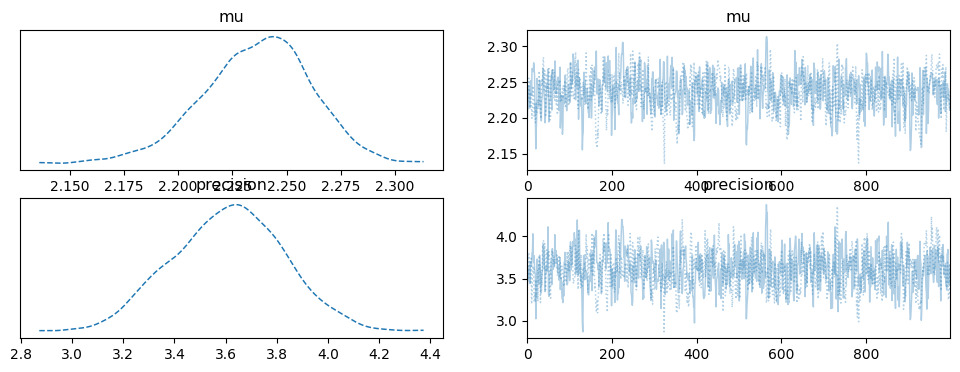

In [342]:
az.plot_trace(trace,combined=True)

In [343]:
az.summary(trace,round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,2.24,0.03,2.19,2.28,0.00,0.00,607.59,666.53,1.0
precision,3.61,0.22,3.21,4.02,0.01,0.01,589.22,771.18,1.0


array([<Axes: title={'center': 'mu'}>,
       <Axes: title={'center': 'precision'}>], dtype=object)

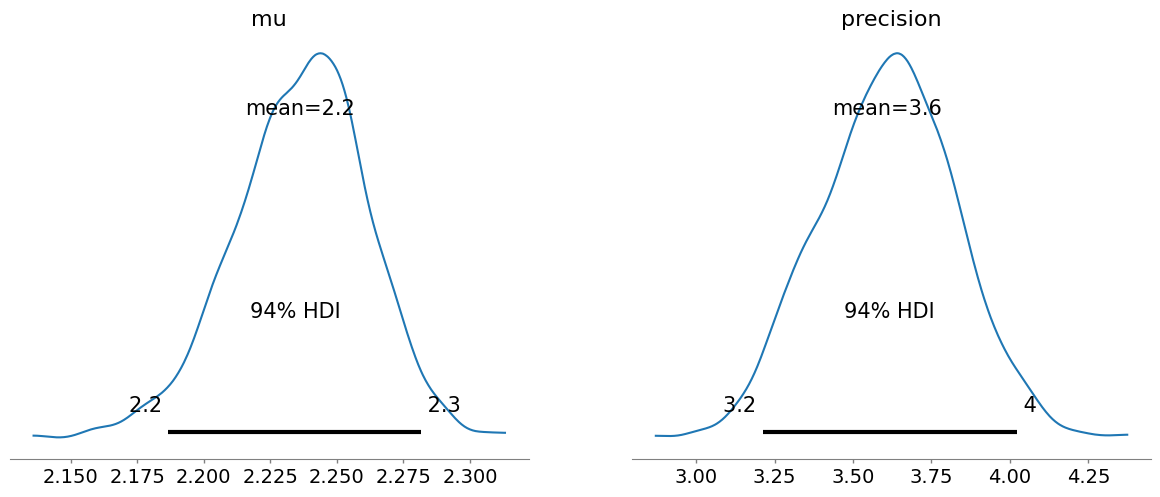

In [346]:
az.plot_posterior(trace)

### 5. Posterior Distribution

We first show the best fit from the Monte Carlo simulations against the truncated data to verify that this data appears to be fit well.

In [347]:
def norm(x1,mu1,tau1):
  return np.sqrt(tau1/(2*np.pi))*np.exp(-tau1/2*(x1-mu1)**2)

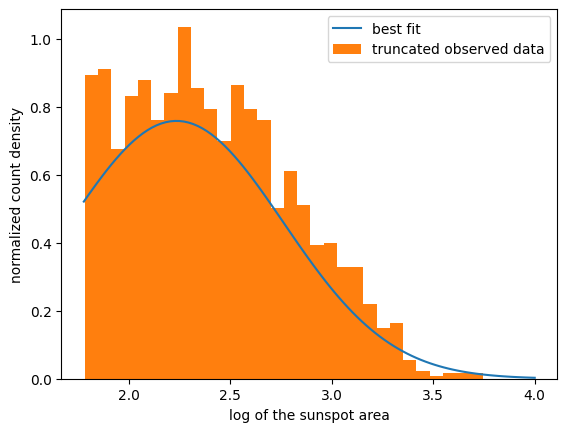

In [348]:
#using mean value of the mu and precision from our fitting to plot the posterior
mu_post = trace.posterior["mu"].mean().values
precision_post = trace.posterior["precision"].mean().values

xgrid = np.linspace(1.78,4,num=100)
normgrid = []
for i in xgrid:
  normgrid.append(norm(i,mu_post,precision_post))
normgrid = np.array(normgrid)

fig,ax = plt.subplots()
ax.plot(xgrid,normgrid,label="best fit")
ax.hist(logarea,density=True,bins=30,label="truncated observed data")
ax.set_xlabel("log of the sunspot area")
ax.set_ylabel("normalized count density")
plt.legend()

The best fit normal distribution appears to fit the truncated data. However, we also want to see if it is able to work with the untruncated data that we had excluded because of the previously mentioned systematic errors in the data collection, which were mentioned by the reference paper.

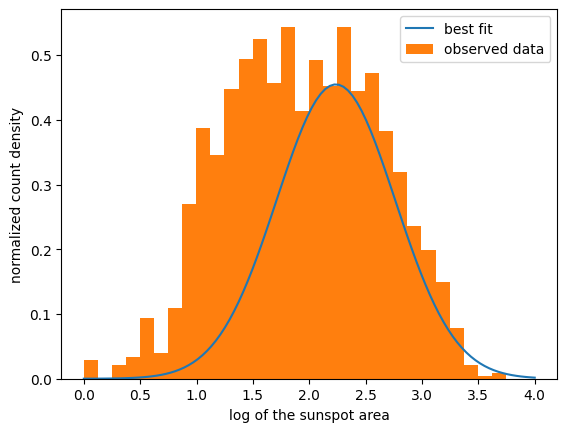

In [349]:
#using mean value of the mu and precision from our fitting to plot the posterior
mu_post = trace.posterior["mu"].mean().values
precision_post = trace.posterior["precision"].mean().values

xgrid = np.linspace(0,4,num=100)
normgrid = []
for i in xgrid:
  normgrid.append(norm(i,mu_post,precision_post))
normgrid = np.array(normgrid)

fig,ax = plt.subplots()
ax.plot(xgrid,0.6*normgrid,label="best fit")
ax.hist(logarea_whole,density=True,bins=30,label="observed data")
ax.set_xlabel("log of the sunspot area")
ax.set_ylabel("normalized count density")
plt.legend()

The model does not appear to extend to the untruncated data. This is expected as the data set comes with significant systematic errors, which could be causing the difference in behaviors above and below this cutoff.

The reference paper provides some values for mean sunspot area. It estimates a mean sunspot area between 30.2 and 62.2 millionths of a solar hemisphere (MSH) depending on the data collection method used. The mean sunspot area for our distribution is 173.8 MSH, which is significantly higher than the values found in the reference paper. The potential reasons for this error will be discussed in section 6.

#### 5.1 Posterior Predictive Check

In [350]:
with model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

<Axes: xlabel='area / area'>

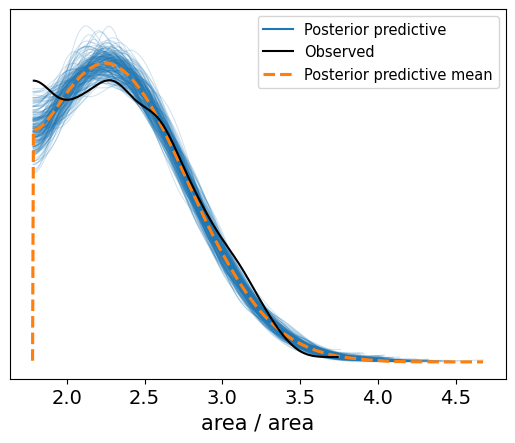

In [351]:
az.plot_ppc(trace,num_pp_samples=200)

### 6. Reporting Conclusions

We find that the log of the sunspot area is fit well by a normal distribution, and thus, the sunspot area would be fit well by a log normal distribution. This agrees with the finds in the [literature](https://doi.org/10.1051/0004-6361:20053415). However, our fitting parameters did not agree with those published in the above paper. They found the mean of the sunspot area ranged from 30.2 to 62.2 millionths of a solar hemisphere (MSH) using varying methods. We calculated our mean of the sunspot area to be 173.8 MSH.

We believe this error could originate from a few sources. First, in the histogram of the log of the data, we find that there a few peaks close to the middle of the distribution. Thus, our data does not appear to be fully normally distributed. While we have almost 2,000 data points, it is possible more data could be needed to resolve this. There could also be some systematic error in how the data was collected, though we are not able to pin down these causes. Much of the data from the Greenwich sunspot group records were originally taken down by hand before moving all the information online by the efforts of various groups so there could be potential error when moving all the data online.

These peaks provided some difficulty in the modeling and could have been the cause for the error in the fitting, as compared to the reference paper. When truncating the dat to exclude the less behaved data, the data gets truncated close to a local minimum in the distribution which may be resulting in the mean for the normal distribution being pushed higher than expected. Finally, our data is only taking into account 2 years, 1968 and 1976 while the literature is using data over 102 years, so much more data to sort through to get a final mean of 30.2 to 62.2 MSH.

### 7. Sensitivity Analysis

We tested the model using a range of possible $\mu$ values for the prior and found little difference in the results. Changing the precision likewise resulted in no change to the results. Across a range of parameters for our prior, our results remained constant suggesting that our model is robust, especially aided by the large number of data points we have in our data set.

### 8. Reproducibility

The CSV file of the data used can be found [here](https://drive.google.com/file/d/1nOktHZ4Qs8jKDr2GPzAje64YlsDZdysb/view?usp=sharing). All random seed generators used in the calculation had a seed set to 314159. Can be run using any Python environment that also supports PyMC. The required packages to install to be able to run the code are found in section 2.1 and 3.